# Equity Analysis with Python - Introduction (Part 1)

---

# yfinance API - first steps

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
symbol = "AAPL" # ticker symbol for Apple Inc.

In [ ]:
df = yf.download(tickers = symbol)

In [13]:
# the most resent days on the tail (at the end of the data frame).
df.tail()

,Open,High,Low,Close,Adj Close,Volume
2023-11-02,175.520004,177.779999,175.460007,177.570007,177.570007,77334800
2023-11-03,174.240005,176.820007,173.350006,176.649994,176.649994,79763700
2023-11-06,176.380005,179.429993,176.210007,179.229996,179.229996,63841300
2023-11-07,179.179993,182.440002,178.970001,181.820007,181.820007,70464000
2023-11-08,182.350006,183.449997,182.179993,183.354996,183.354996,8037934


In [5]:
# Make sure the index is on a date dime format
df.index = pd.to_datetime(df.index.date)
df

,Open,High,Low,Close,Adj Close,Volume
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...
2023-11-02,175.520004,177.779999,175.460007,177.570007,177.570007,77334800
2023-11-03,174.240005,176.820007,173.350006,176.649994,176.649994,79763700
2023-11-06,176.380005,179.429993,176.210007,179.229996,179.229996,63841300
2023-11-07,179.179993,182.440002,178.970001,181.820007,181.820007,70464000


In [12]:
df.index[:10]

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26'],
              dtype='datetime64[ns]', freq=None)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10818 entries, 1980-12-12 to 2023-11-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10818 non-null  float64
 1   High       10818 non-null  float64
 2   Low        10818 non-null  float64
 3   Close      10818 non-null  float64
 4   Adj Close  10818 non-null  float64
 5   Volume     10818 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 591.6 KB


- __Date__: Date (year-month-day) at midnight New York Time (business daily data without weekends and bank holidays)
- __Open__: daily Open Price @ 9:30 am Eastern TimeZone
- __High__: daily high/max price
- __Low__: daily low/min price
- __Close__: daily Close Price @ 4:00 pm Eastern TimeZone
- __Adj Close__: Close price adjusted for Dividend Payments (backward adjusted)
- __Volume__: daily Trading Volume (number of Shares)

__Price Chart__

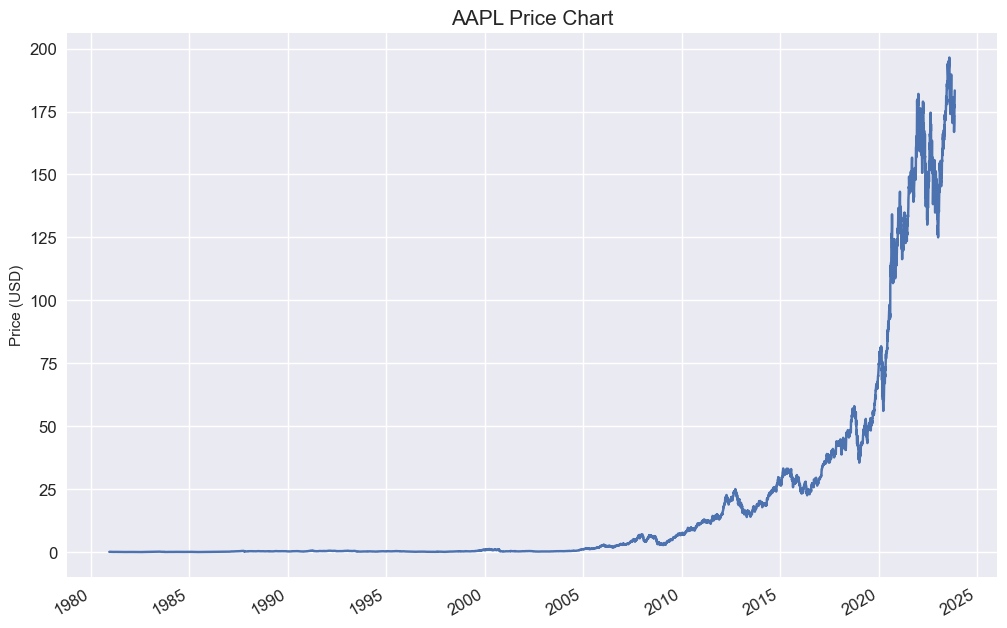

In [8]:
# Plot the close price 
df.Close.plot(figsize = (12, 8), fontsize = 12)
plt.ylabel("Price (USD)")
plt.title("AAPL Price Chart", fontsize = 15)
plt.show()

__Volume Chart__

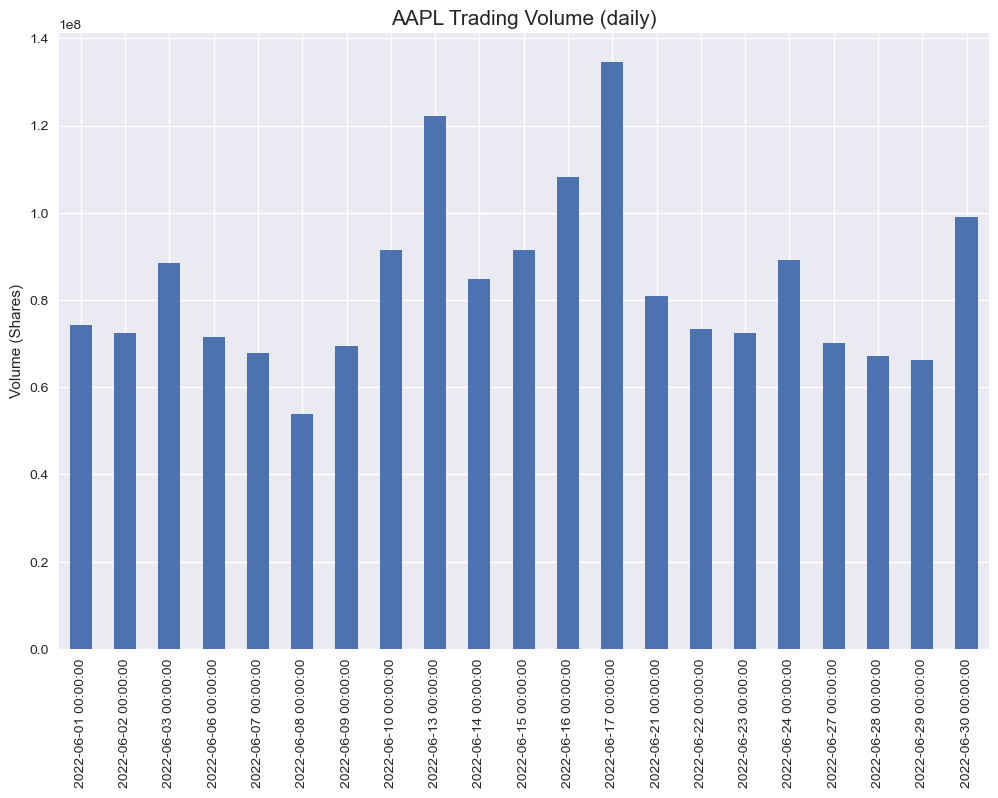

In [9]:
df.loc["2022-6", "Volume"].plot(figsize = (12, 8), kind = "bar")
plt.ylabel("Volume (Shares)")
plt.title("AAPL Trading Volume (daily)", fontsize = 15)
plt.show()

In [10]:
df.Volume.mul(df.Close) # Trading Volume (USD Value)

1980-12-12    6.019952e+07
1980-12-15    2.139674e+07
1980-12-16    1.191798e+07
1980-12-17    9.985128e+06
1980-12-18    8.730367e+06
                  ...     
2023-11-02    1.373234e+10
2023-11-03    1.409026e+10
2023-11-06    1.144228e+10
2023-11-07    1.281176e+10
2023-11-08    1.473795e+09
Length: 10818, dtype: float64

---

# Analysis Period

In [34]:
df

,Open,High,Low,Close,Adj Close,Volume
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...
2023-11-02,175.520004,177.779999,175.460007,177.570007,177.570007,77334800
2023-11-03,174.240005,176.820007,173.350006,176.649994,176.649994,79763700
2023-11-06,176.380005,179.429993,176.210007,179.229996,179.229996,63841300
2023-11-07,179.179993,182.440002,178.970001,181.820007,181.820007,70464000


In [35]:
df.loc["2022-01-01":"2022-01-15"]

,Open,High,Low,Close,Adj Close,Volume
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.190979,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.904053,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.171844,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.281006,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.449310,86709100
2022-01-10,169.080002,172.500000,168.169998,172.190002,170.469101,106765600
2022-01-11,172.320007,175.179993,170.820007,175.080002,173.330231,76138300
2022-01-12,176.119995,177.179993,174.820007,175.529999,173.775726,74805200
2022-01-13,175.779999,176.619995,171.789993,172.190002,170.469101,84505800
2022-01-14,171.339996,173.779999,171.089996,173.070007,171.340332,80440800


In [36]:
df.loc["2022"]

,Open,High,Low,Close,Adj Close,Volume
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.190979,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.904053,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.171844,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.281006,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.449310,86709100
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477585,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504539,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.059372,75703700


In [37]:
df.loc["2017":]

,Open,High,Low,Close,Adj Close,Volume
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.059307,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.029024,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.166471,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.469336,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.720936,134247600
...,...,...,...,...,...,...
2023-11-02,175.520004,177.779999,175.460007,177.570007,177.570007,77334800
2023-11-03,174.240005,176.820007,173.350006,176.649994,176.649994,79763700
2023-11-06,176.380005,179.429993,176.210007,179.229996,179.229996,63841300
2023-11-07,179.179993,182.440002,178.970001,181.820007,181.820007,70464000


In [38]:
df = yf.download(tickers = symbol, start = "2020-07-01", end = "2020-12-31")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-01,91.279999,91.839996,90.977501,91.027496,89.250427,110737200
2020-07-02,91.962502,92.617500,90.910004,91.027496,89.250427,114041600
2020-07-06,92.500000,93.945000,92.467499,93.462502,91.637894,118655600
2020-07-07,93.852501,94.654999,93.057503,93.172501,91.353554,112424400
2020-07-08,94.180000,95.375000,94.089996,95.342499,93.481201,117092000
...,...,...,...,...,...,...
2020-12-23,132.160004,132.429993,130.779999,130.960007,128.856827,88223700
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.850616,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.494797,124486200


Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max

In [39]:
df = yf.download(tickers = symbol, period = "1mo") # last 30 days
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-09,176.809998,179.050003,175.800003,178.990005,178.990005,42390800
2023-10-10,178.100006,179.720001,177.949997,178.389999,178.389999,43698000
2023-10-11,178.199997,179.850006,177.600006,179.800003,179.800003,47551100
2023-10-12,180.070007,182.339996,179.039993,180.710007,180.710007,56743100
2023-10-13,181.419998,181.929993,178.139999,178.850006,178.850006,51427100
2023-10-16,176.750000,179.080002,176.509995,178.720001,178.720001,52517000
2023-10-17,176.649994,178.419998,174.800003,177.149994,177.149994,57549400
2023-10-18,175.580002,177.580002,175.110001,175.839996,175.839996,54764400
2023-10-19,176.039993,177.839996,175.190002,175.460007,175.460007,59302900


In [40]:
df = yf.download(tickers = symbol, period = "1y") # last 365 days 
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-08,140.410004,141.429993,137.490005,139.500000,138.907364,89908500
2022-11-09,138.500000,138.550003,134.589996,134.869995,134.297028,74917800
2022-11-10,141.240005,146.869995,139.500000,146.869995,146.246048,118854000
2022-11-11,145.820007,150.009995,144.369995,149.699997,149.064026,93979700
2022-11-14,148.970001,150.279999,147.429993,148.279999,147.650055,73374100
...,...,...,...,...,...,...
2023-11-02,175.520004,177.779999,175.460007,177.570007,177.570007,77334800
2023-11-03,174.240005,176.820007,173.350006,176.649994,176.649994,79763700
2023-11-06,176.380005,179.429993,176.210007,179.229996,179.229996,63841300


In [41]:
df = yf.download(tickers = symbol, period = "ytd") # year-to-date 
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.538658,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.823189,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.488876,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,129.069321,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.597061,70790800
...,...,...,...,...,...,...
2023-11-02,175.520004,177.779999,175.460007,177.570007,177.570007,77334800
2023-11-03,174.240005,176.820007,173.350006,176.649994,176.649994,79763700
2023-11-06,176.380005,179.429993,176.210007,179.229996,179.229996,63841300


In [42]:
df = yf.download(tickers = symbol, period = "max") # max
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...
2023-11-02,175.520004,177.779999,175.460007,177.570007,177.570007,77334800
2023-11-03,174.240005,176.820007,173.350006,176.649994,176.649994,79763700
2023-11-06,176.380005,179.429993,176.210007,179.229996,179.229996,63841300


---

# Data Frequency

Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo <br>
(Intraday data cannot extend last 60 days)

__daily (default)__

In [43]:
df = yf.download(tickers = symbol, interval = "1d")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...
2023-11-02,175.520004,177.779999,175.460007,177.570007,177.570007,77334800
2023-11-03,174.240005,176.820007,173.350006,176.649994,176.649994,79763700
2023-11-06,176.380005,179.429993,176.210007,179.229996,179.229996,63841300


__monthly__

In [44]:
df = yf.download(tickers = symbol, interval = "1mo")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1985-01-01,0.130022,0.138951,0.124442,0.129464,0.100314,6366416000
1985-02-01,0.129464,0.137277,0.110491,0.110491,0.085613,4733388800
1985-03-01,0.110491,0.116071,0.092634,0.098772,0.076533,4615587200
1985-04-01,0.098772,0.102679,0.087612,0.094866,0.073506,2868028800
1985-05-01,0.094866,0.099330,0.075335,0.077567,0.060102,4639129600
...,...,...,...,...,...,...
2023-07-01,193.779999,198.229996,186.600006,196.449997,196.185074,996066400
2023-08-01,196.240005,196.729996,171.960007,187.869995,187.616638,1322439400
2023-09-01,189.490005,189.979996,167.619995,171.210007,171.210007,1337586600


__weekly__

In [45]:
df = yf.download(tickers = symbol, interval = "1wk")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-08,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1980-12-15,0.122210,0.126674,0.112723,0.126116,0.097720,490134400
1980-12-22,0.132254,0.159040,0.132254,0.158482,0.122799,187891200
1980-12-29,0.160714,0.161272,0.152344,0.154018,0.119340,219452800
1981-01-05,0.151228,0.151228,0.135045,0.142299,0.110259,197904000
...,...,...,...,...,...,...
2023-10-09,176.809998,182.339996,175.800003,178.850006,178.850006,241810100
2023-10-16,176.750000,179.080002,172.639999,172.880005,172.880005,288323000
2023-10-23,170.910004,174.009995,165.669998,168.220001,168.220001,286078100


__intraday - 1h__

In [46]:
df = yf.download(tickers = symbol, interval = "1h")
df

[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AAPL']: Exception('%ticker%: 1h data not available for startTime=345479400 and endTime=1699456511. The requested range must be within the last 730 days.')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [47]:
df = yf.download(tickers = symbol, period = "1y", interval = "1h")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-11-08 09:30:00-05:00,139.578293,139.750000,138.039993,138.440002,138.440002,0
2022-11-08 10:30:00-05:00,138.449997,140.309998,138.384995,140.267899,140.267899,9506478
2022-11-08 11:30:00-05:00,140.270004,141.149994,140.169998,140.809998,140.809998,9411470
2022-11-08 12:30:00-05:00,140.800003,141.429993,139.449997,139.639999,139.639999,9268899
2022-11-08 13:30:00-05:00,139.639999,140.129700,137.639999,137.680893,137.680893,10771658
...,...,...,...,...,...,...
2023-11-07 12:30:00-05:00,181.175003,182.160004,180.934998,182.014999,182.014999,6208182
2023-11-07 13:30:00-05:00,182.018494,182.440002,181.929993,182.340897,182.340897,5219872
2023-11-07 14:30:00-05:00,182.350006,182.429993,181.899994,182.198303,182.198303,5513486


__intraday - 1m__

In [52]:
df = yf.download(tickers = symbol,  interval = "1m")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-11-01 11:18:00-04:00,171.335007,171.404999,171.320007,171.399994,171.399994,0
2023-11-01 11:19:00-04:00,171.395004,171.399994,171.320007,171.350006,171.350006,85546
2023-11-01 11:20:00-04:00,171.360001,171.369995,171.210007,171.229996,171.229996,82837
2023-11-01 11:21:00-04:00,171.225006,171.259995,171.190002,171.250000,171.250000,68817
2023-11-01 11:22:00-04:00,171.240005,171.289993,171.229996,171.250000,171.250000,43556
...,...,...,...,...,...,...
2023-11-08 10:13:00-05:00,183.255005,183.330002,183.119995,183.128998,183.128998,200821
2023-11-08 10:14:00-05:00,183.120102,183.139999,183.020004,183.023102,183.023102,125387
2023-11-08 10:15:00-05:00,183.020004,183.024994,182.820007,182.824997,182.824997,199030


In [49]:
df = yf.download(tickers = symbol, period = "1wk", interval = "1m")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-11-01 10:16:00-04:00,170.910004,171.070007,170.869995,171.059998,171.059998,0
2023-11-01 10:17:00-04:00,171.059998,171.259995,171.059998,171.190002,171.190002,140359
2023-11-01 10:18:00-04:00,171.199997,171.350006,171.139999,171.345001,171.345001,103514
2023-11-01 10:19:00-04:00,171.344894,171.445007,171.300003,171.360992,171.360992,146650
2023-11-01 10:20:00-04:00,171.360001,171.479996,171.330093,171.434998,171.434998,127243
...,...,...,...,...,...,...
2023-11-08 10:11:00-05:00,182.970001,182.988800,182.810104,182.839401,182.839401,135855
2023-11-08 10:12:00-05:00,182.835999,183.279999,182.830002,183.279999,183.279999,320280
2023-11-08 10:13:00-05:00,183.255005,183.330002,183.119995,183.128998,183.128998,200821


---

# Dividends

__Dividend__: A dividend is a __distribution of profits__ by a corporation to its shareholders.

Companies are __free__ to distribute (all / parts / none) of their profits to shareholders (Dividend Payout Policy) 

Dividend Payouts are an import __source of income__ for equity investors.

__Total Return/Profit__ of stocks consists of:
- Stock Price Increase
- Dividend Payouts

- For __innovative & high-growth__ companies, __Stock Price Increase__ is relatively more important.
- For __mature & highly profitable__ companies, __Dividend Payouts__ can be a significant part of Total Return/Profit.

-> __Don´t omit Dividend Payouts__ in your Analysis / Performance Comparison! (otherwise, high-dividend stocks get penalized!)

__For this and the next lectures, you have the choice between__
- option 1: working with the same data as in the videos (saved in the csv file aapl.csv) __RECOMMENDED!!!__
- option 2: working with your specific maximum time period

In [54]:
# option 1 -> same data as in video
df = pd.read_csv("aapl.csv", index_col = "Date", parse_dates = ["Date"]) # for more information, see lecture "Saving and Loading Data (Local Files)"  
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,0.0
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,0.0
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,0.0


In [60]:
# option 2 -> max period
df = yf.download(tickers = symbol, actions = True) 
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-11-02,175.520004,177.779999,175.460007,177.570007,177.570007,77334800,0.0,0.0
2023-11-03,174.240005,176.820007,173.350006,176.649994,176.649994,79763700,0.0,0.0
2023-11-06,176.380005,179.429993,176.210007,179.229996,179.229996,63841300,0.0,0.0


In [62]:
df.loc[df.Dividends != 0]

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1987-05-11,0.343750,0.354911,0.342634,0.343750,0.266758,197276800,0.000536,0.0
1987-08-10,0.430804,0.430804,0.408482,0.430804,0.334746,77996800,0.000536,0.0
1987-11-17,0.328125,0.330357,0.312500,0.312500,0.243350,268800000,0.000714,0.0
1988-02-12,0.362723,0.370536,0.361607,0.366071,0.285629,137760000,0.000714,0.0
1988-05-16,0.361607,0.369420,0.357143,0.368304,0.287940,74760000,0.000714,0.0
...,...,...,...,...,...,...,...,...
2022-08-05,163.210007,165.850006,163.000000,165.350006,164.374878,56697000,0.230000,0.0
2022-11-04,142.089996,142.669998,134.380005,138.380005,137.792114,140814800,0.230000,0.0
2023-02-10,149.460007,151.339996,149.220001,151.009995,150.598038,57450700,0.230000,0.0


In [63]:
df.Dividends.sum() # cumulative Dividends per share

7.543564000000001

In [64]:
df.Close[-1] - df.Close[0] # cumulative Stock Price Increase

182.62165200710297

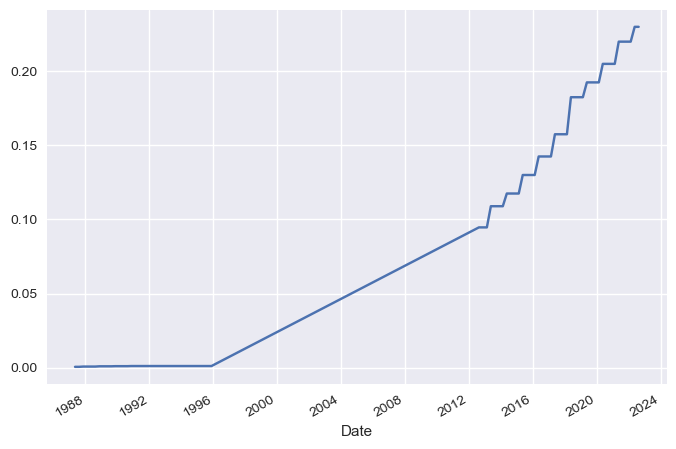

In [59]:
# Plot the divident distribution 
# We can see that dividents increasing very stable over time. 
df.loc[df.Dividends != 0].Dividends.plot()
plt.show()

-> AAPL Dividend Policy: 
- historically __low-dividend__ stock (focus on growth) 
- Dividend Payouts __smoothed and steadily growing__ (highly predictable)
- __Avoiding Dividend Cuts__ in less profitable years (negative signal in the market)

---

# What´s the Adjusted Close Price?

"The Adjusted Close Price is the backward adjusted (reduced) Close Price (adjusted for Dividends)."   

In [68]:
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-11-02,175.520004,177.779999,175.460007,177.570007,177.570007,77334800,0.0,0.0
2023-11-03,174.240005,176.820007,173.350006,176.649994,176.649994,79763700,0.0,0.0
2023-11-06,176.380005,179.429993,176.210007,179.229996,179.229996,63841300,0.0,0.0


In [69]:
df2 = df[["Close", "Adj Close", "Dividends"]].copy()
df2

,Close,Adj Close,Dividends
Date,,,
1980-12-12,0.128348,0.099450,0.0
1980-12-15,0.121652,0.094261,0.0
1980-12-16,0.112723,0.087343,0.0
1980-12-17,0.115513,0.089504,0.0
1980-12-18,0.118862,0.092099,0.0
...,...,...,...
2023-11-02,177.570007,177.570007,0.0
2023-11-03,176.649994,176.649994,0.0
2023-11-06,179.229996,179.229996,0.0


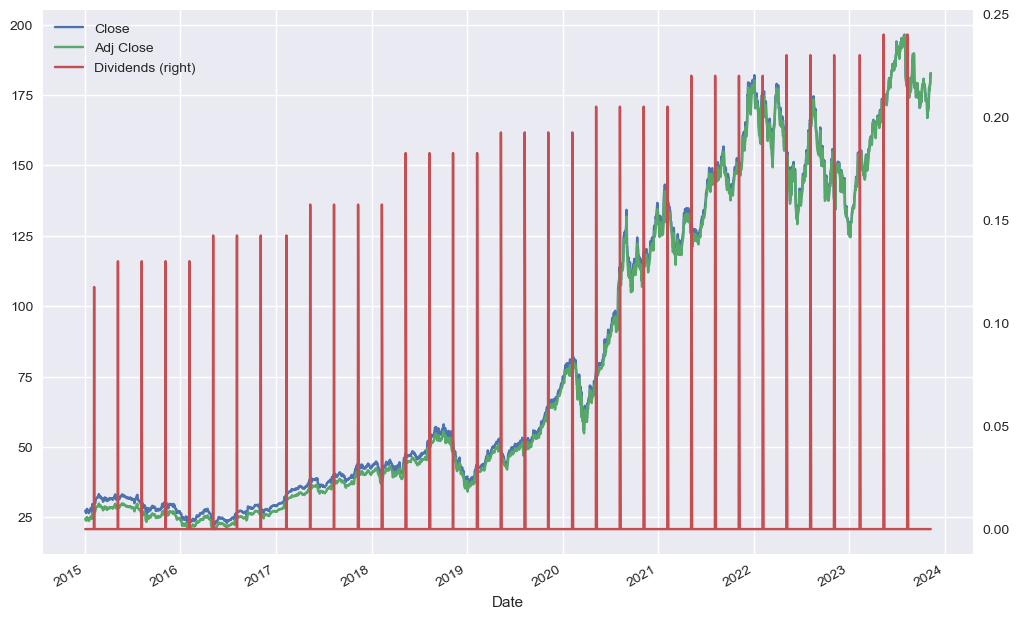

In [70]:
df2.loc["2015":].plot(figsize = (12, 8), secondary_y = "Dividends")
plt.show()

In [71]:
# Where was dividents distribution
df2[df2.Dividends > 0]

,Close,Adj Close,Dividends
Date,,,
1987-05-11,0.343750,0.266758,0.000536
1987-08-10,0.430804,0.334746,0.000536
1987-11-17,0.312500,0.243350,0.000714
1988-02-12,0.366071,0.285629,0.000714
1988-05-16,0.368304,0.287940,0.000714
...,...,...,...
2022-08-05,165.350006,164.374878,0.230000
2022-11-04,138.380005,137.792114,0.230000
2023-02-10,151.009995,150.598038,0.230000


__Interpretation__ (to table above)
If the Dividends = 0.24000, its mean taht I got **0.24$** per share!   

In [80]:
# take the last dividents
last_div = df2.loc["2022-08-01": "2022-08-5"].copy()
last_div

,Close,Adj Close,Dividends
Date,,,
2022-08-01,161.509995,160.334793,0.00
2022-08-02,160.009995,158.845703,0.00
2022-08-03,166.130005,164.921188,0.00
2022-08-04,165.809998,164.603516,0.00
2022-08-05,165.350006,164.374878,0.23


In [81]:
last_div.Close - last_div["Adj Close"]

Date
2022-08-01    1.175201
2022-08-02    1.164291
2022-08-03    1.208817
2022-08-04    1.206482
2022-08-05    0.975128
dtype: float64

https://in.help.yahoo.com/kb/adjusted-close-sln28256.html

__Dividend multipliers__ are calculated based on dividend as a percentage of the price, primarily to avoid negative historical pricing.

For example:

- If a $0.08 cash dividend is distributed on Feb 19 (ex- date), and the Feb 18 closing price is $24.96, the pre-dividend data is multiplied by (1-0.08/24.96) = 0.9968.

- If a $2.40 cash dividend is distributed on May 12 (ex- date), and the May 11 closing price is $16.51, the pre-dividend data is multiplied by (1-2.40/16.51) = 0.8546.

- If a $1.25 cash dividend is distributed on Jan 25 (ex- date), and the Jan 24 closing price is $51.20, the pre-dividend data is multiplied by (1-1.25/51.20) = 0.9756.

In [74]:
# 0.23 -> the dividents paymant
# 165.809 -> the previes close price 
multiplier = (1 - 0.23/165.809998)
multiplier

0.9986128701358528

In [76]:
# Then calculate the adj close price
last_div["Adj Close calc"] = last_div.Close * multiplier
last_div

,Close,Adj Close,Dividends,Adj Close calc
Date,,,,
2022-08-01,161.509995,160.334793,0.00,161.285959
2022-08-02,160.009995,158.845703,0.00,159.788040
2022-08-03,166.130005,164.921188,0.00,165.899561
2022-08-04,165.809998,164.603516,0.00,165.579998
2022-08-05,165.350006,164.374878,0.23,165.120644


In [77]:
# total multiplier (all dividends)
df["Adj Close"] / df["Close"] 

Date
1980-12-12    0.774843
1980-12-15    0.774843
1980-12-16    0.774843
1980-12-17    0.774843
1980-12-18    0.774843
                ...   
2023-11-02    1.000000
2023-11-03    1.000000
2023-11-06    1.000000
2023-11-07    1.000000
2023-11-08    1.000000
Length: 10818, dtype: float64

In [78]:
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-11-02,175.520004,177.779999,175.460007,177.570007,177.570007,77334800,0.0,0.0
2023-11-03,174.240005,176.820007,173.350006,176.649994,176.649994,79763700,0.0,0.0
2023-11-06,176.380005,179.429993,176.210007,179.229996,179.229996,63841300,0.0,0.0


__Interpretations:__
- Borrowing parts (e.g. 22%) of initial stock purchase price in 1980 and pay back borrowed amounts with Dividends. -or-
- Reinvesting Dividends and buying more shares with Dividends

__Benefits:__
- good approximation for a Stock´s __Total Return__ (Price Return + Dividend Yield)
- allows __Performance Comparison__ across stocks with different Payout Policies

---

# Stock Splits

In [82]:
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-11-02,175.520004,177.779999,175.460007,177.570007,177.570007,77334800,0.0,0.0
2023-11-03,174.240005,176.820007,173.350006,176.649994,176.649994,79763700,0.0,0.0
2023-11-06,176.380005,179.429993,176.210007,179.229996,179.229996,63841300,0.0,0.0


All Prices (OHLC, Adj Close) and Dividends are __backward adjusted__ (reduced) for Stock Splits. 

-> This __makes perfectly sense__ and you should not question it (unless you are interested in historical observable prices)!

In [83]:
splits = df.loc[df["Stock Splits"] > 0]
splits

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1987-06-16,0.370536,0.372768,0.339286,0.370536,0.287544,342720000,0.0,2.0
2000-06-21,0.901786,1.016741,0.898438,0.993304,0.843113,490000000,0.0,2.0
2005-02-28,1.595714,1.612143,1.570000,1.602143,1.359893,651610400,0.0,2.0
2014-06-09,23.174999,23.469999,22.937500,23.424999,20.802183,301660000,0.0,7.0
2020-08-31,127.580002,131.000000,126.000000,129.039993,126.748947,225702700,0.0,4.0


__Stock Split__: allows a company to break (split) each share into multiple shares __without affecting its market capitalization (total value of all its shares) or each investor's stake__ in the company. Motivation: reduce price per share and increase granularity.

__Example Stock Split 4:1__ -> Receive 4 new shares for 1 old share. Share Price immediately drops to 1/4 (no value effect)

On Yahoo Finance, Prices & Dividends are backward adjusted for Stock Splits. 

Price on 2020-08-31 __after Split__:

In [84]:
splits.loc["2020-08-31", "Close"] 

129.0399932861328

Price on 2020-08-31 __before Split__:

In [85]:
splits.loc["2020-08-31", "Close"] * splits.loc["2020-08-31", "Stock Splits"]

516.1599731445312

__-> 4 * 129 == 1 * 516__

__Calculate the unadjusted (observable) prices__

In [86]:
df["Stock Splits"].replace(to_replace = 0, value = 1, inplace = True) # 1:1 on all other days
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600,0.0,1.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800,0.0,1.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000,0.0,1.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600,0.0,1.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600,0.0,1.0
...,...,...,...,...,...,...,...,...
2023-11-02,175.520004,177.779999,175.460007,177.570007,177.570007,77334800,0.0,1.0
2023-11-03,174.240005,176.820007,173.350006,176.649994,176.649994,79763700,0.0,1.0
2023-11-06,176.380005,179.429993,176.210007,179.229996,179.229996,63841300,0.0,1.0


In [87]:
# cumulative multipier
df["Multiplier"] = df.sort_index(ascending = False)["Stock Splits"].cumprod()
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Multiplier
Date,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600,0.0,1.0,224.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800,0.0,1.0,224.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000,0.0,1.0,224.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600,0.0,1.0,224.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600,0.0,1.0,224.0
...,...,...,...,...,...,...,...,...,...
2023-11-02,175.520004,177.779999,175.460007,177.570007,177.570007,77334800,0.0,1.0,1.0
2023-11-03,174.240005,176.820007,173.350006,176.649994,176.649994,79763700,0.0,1.0,1.0
2023-11-06,176.380005,179.429993,176.210007,179.229996,179.229996,63841300,0.0,1.0,1.0


In [88]:
# observable close price
df["Close_unadj"] = df["Close"] * df.Multiplier 
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Multiplier,Close_unadj
Date,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600,0.0,1.0,224.0,28.749950
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800,0.0,1.0,224.0,27.250048
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000,0.0,1.0,224.0,25.249952
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600,0.0,1.0,224.0,25.874911
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600,0.0,1.0,224.0,26.625089
...,...,...,...,...,...,...,...,...,...,...
2023-11-02,175.520004,177.779999,175.460007,177.570007,177.570007,77334800,0.0,1.0,1.0,177.570007
2023-11-03,174.240005,176.820007,173.350006,176.649994,176.649994,79763700,0.0,1.0,1.0,176.649994
2023-11-06,176.380005,179.429993,176.210007,179.229996,179.229996,63841300,0.0,1.0,1.0,179.229996


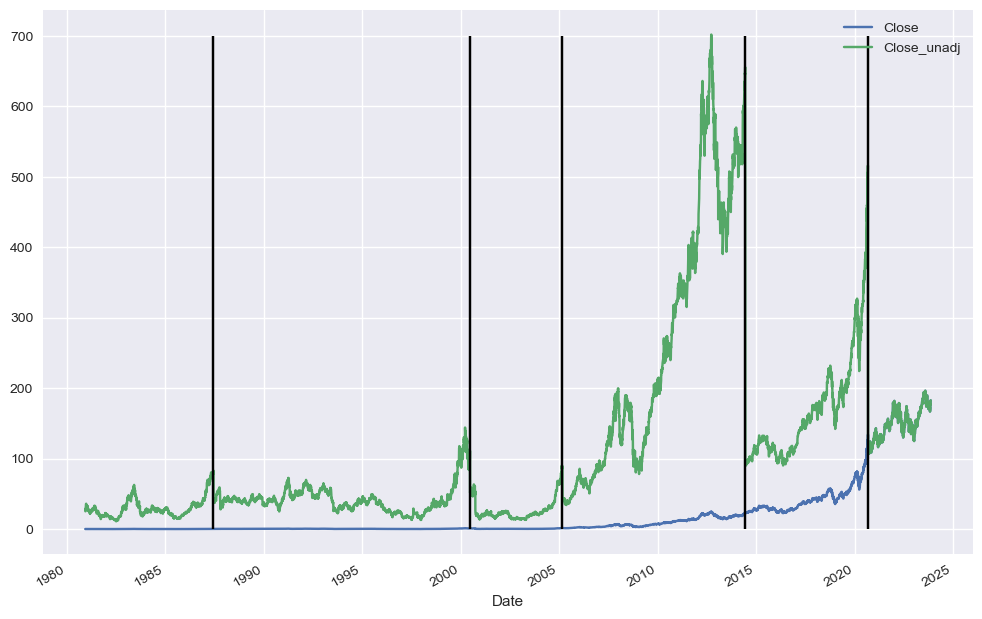

In [89]:
# Plot where was stock split
df[["Close", "Close_unadj"]].plot(figsize = (12 ,8))
plt.vlines(splits.index, 0, 700, color = "black")
plt.show()

__-> (backward adjusted) prices correctly reflect true price performance. They ignore price drops caused by stock splits!__

__unadjusted Dividends__

In [90]:
# Of curse that the dividents are also effected from the slitting.
df["div_unadj"] = df["Dividends"] * df.Multiplier

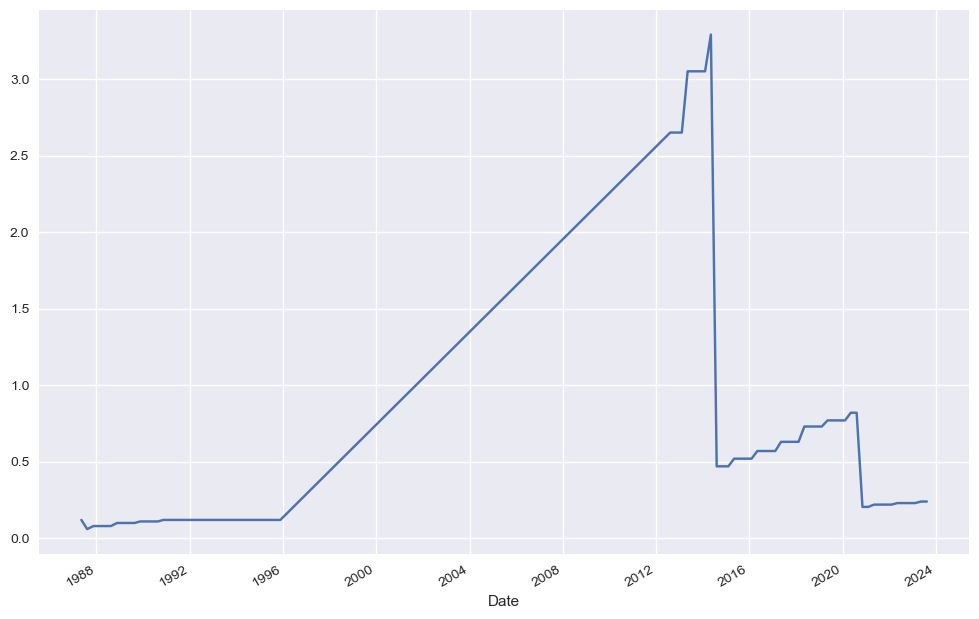

In [91]:
df.loc[df.div_unadj != 0].div_unadj.plot(figsize = (12, 8))
plt.show()

__unadjusted Trading Volume (number of shares)__

We can see that whenever we have a stock split, the number of traded shared jump up. 

Its just effected by the stock split. 

In [92]:
df["Volume_unadj"] = df["Volume"] / df.Multiplier

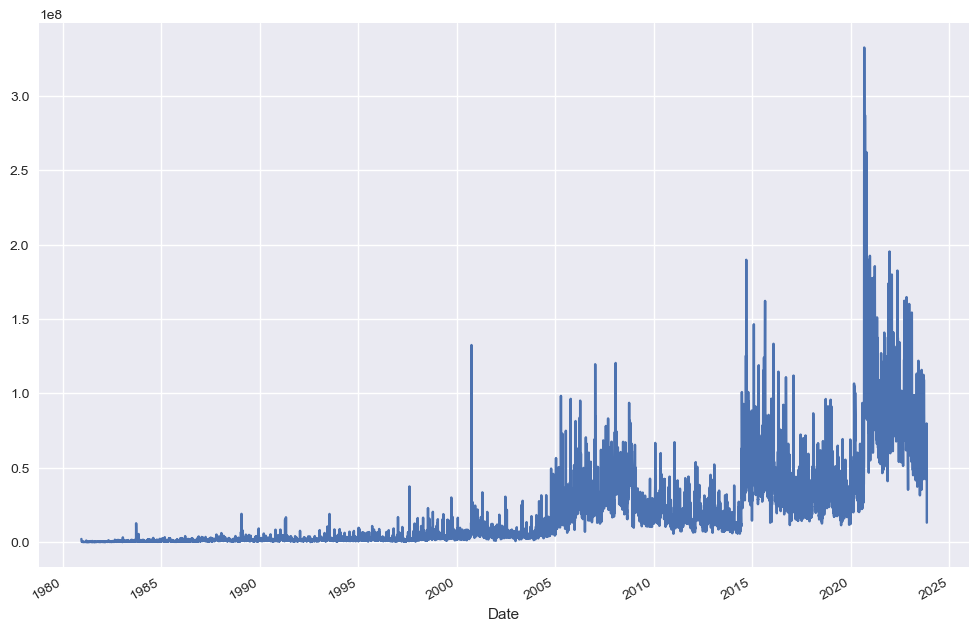

In [93]:
df["Volume_unadj"].plot(figsize = (12, 8))
plt.show()

__The key point__: the effect of stock split can be removed. its not effected on the trades and the capital market.

---

# Stocks from other Countries / Exchanges 

Where we want to take a Ticker (stock), we need to add a **suffix**!

In [94]:
yf.download(tickers = "AAPL") # US Ticker (no suffix)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099449,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...
2023-11-02,175.520004,177.779999,175.460007,177.570007,177.570007,77334800
2023-11-03,174.240005,176.820007,173.350006,176.649994,176.649994,79763700
2023-11-06,176.380005,179.429993,176.210007,179.229996,179.229996,63841300


__Exchange List:__ 

https://help.yahoo.com/kb/SLN2310.html

In [97]:
yf.download(tickers = "RELIANCE.NS") # Indian Ticker

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,15.859429,15.944529,15.754989,15.917452,10.441109,48051995
1996-01-02,15.878770,15.956133,15.677626,15.793671,10.359912,77875009
1996-01-03,16.052837,16.783918,15.878770,15.913584,10.438570,96602936
1996-01-04,15.762726,15.813012,15.553845,15.766594,10.342152,100099436
1996-01-05,15.704703,15.704703,15.522900,15.658285,10.271106,76935930
...,...,...,...,...,...,...
2023-11-01,2289.149902,2317.500000,2275.199951,2297.399902,2297.399902,5154595
2023-11-02,2313.949951,2324.300049,2307.949951,2320.199951,2320.199951,5281052
2023-11-03,2327.199951,2334.949951,2315.750000,2319.699951,2319.699951,4425078


In [98]:
yf.download(tickers = "LHA.DE") # German Ticker (Deutsche Boerse XETRA)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-12-16,10.6451,10.7729,10.3588,10.4559,7.052274,761200
1996-12-17,10.4048,10.6809,10.3281,10.6707,7.197152,751400
1996-12-18,10.6860,10.9365,10.5480,10.5991,7.148859,950800
1996-12-19,10.5582,10.7780,10.5582,10.7167,7.228177,424300
1996-12-20,10.7116,10.8394,10.4815,10.5326,7.104007,544900
...,...,...,...,...,...,...
2023-11-01,6.6770,6.6770,6.5130,6.5710,6.571000,5037440
2023-11-02,6.8800,7.1320,6.8600,7.0360,7.036000,12447464
2023-11-03,7.1100,7.6260,7.0980,7.5320,7.532000,13521431


In [99]:
yf.download(tickers = "LHA.F") # German Ticker (Frankfurt Stock Exchange)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,24.100,24.700001,23.100000,23.100000,16.736546,316400
2000-01-04,23.100,23.400000,22.400000,23.000000,16.664093,487300
2000-01-05,22.250,22.850000,21.799999,22.450001,16.265600,362100
2000-01-06,22.500,23.950001,22.299999,23.799999,17.243711,231100
2000-01-07,23.500,23.950001,23.100000,23.900000,17.316164,273900
...,...,...,...,...,...,...
2023-11-01,6.649,6.654000,6.543000,6.654000,6.654000,28551
2023-11-02,6.900,7.119000,6.900000,7.099000,7.099000,168135
2023-11-03,7.130,7.617000,7.099000,7.599000,7.599000,87883


---

# Multiple Tickers

We can also download multiple tickers!

In [117]:
df = yf.download(tickers = ["AAPL", "MSFT"]) # multiple tickers
df

[*********************100%%**********************]  2 of 2 completed


Adj Close                   Close                    High  \
                  AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
1980-12-12    0.099450         NaN    0.128348         NaN    0.128906   
1980-12-15    0.094261         NaN    0.121652         NaN    0.122210   
1980-12-16    0.087343         NaN    0.112723         NaN    0.113281   
1980-12-17    0.089504         NaN    0.115513         NaN    0.116071   
1980-12-18    0.092099         NaN    0.118862         NaN    0.119420   
...                ...         ...         ...         ...         ...   
2023-11-02  177.570007  348.320007  177.570007  348.320007  177.779999   
2023-11-03  176.649994  352.799988  176.649994  352.799988  176.820007   
2023-11-06  179.229996  356.529999  179.229996  356.529999  179.429993   
2023-11-07  181.820007  360.529999  181.820007  360.529999  182.440002   
2023-11-08  182.365005  362.579987  182.365005  362.579987  183.449997   

                               Low                    Open              \
                  MSFT        AAPL        MSFT        AAPL        MSFT   
Date                                                                     
1980-12-12         NaN    0.128348         NaN    0.128348         NaN   
1980-12-15         NaN    0.121652         NaN    0.122210         NaN   
1980-12-16         NaN    0.112723         NaN    0.113281         NaN   
1980-12-17         NaN    0.115513         NaN    0.115513         NaN   
1980-12-18         NaN    0.118862         NaN    0.118862         NaN   
...                ...         ...         ...         ...         ...   
2023-11-02  348.829987  175.460007  344.769989  175.520004  347.239990   
2023-11-03  354.390015  173.350006  347.329987  174.240005  349.630005   
2023-11-06  357.540009  176.210007  353.350006  176.380005  353.450012   
2023-11-07  362.459991  178.970001  357.630005  179.179993  359.399994   
2023-11-08  363.869995  182.059998  360.549988  182.350006  361.679993   

               Volume              
                 AAPL        MSFT  
Date                               
1980-12-12  469033600         NaN  
1980-12-15  175884800         NaN  
1980-12-16  105728000         NaN  
1980-12-17   86441600         NaN  
1980-12-18   73449600         NaN  
...               ...         ...  
2023-11-02   77334800  24348100.0  
2023-11-03   79763700  23624000.0  
2023-11-06   63841300  23828300.0  
2023-11-07   70464000  25807100.0  
2023-11-08   21790039   9549636.0  

[10818 rows x 12 columns]

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10818 entries, 1980-12-12 to 2023-11-08
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  10818 non-null  float64
 1   (Adj Close, MSFT)  9492 non-null   float64
 2   (Close, AAPL)      10818 non-null  float64
 3   (Close, MSFT)      9492 non-null   float64
 4   (High, AAPL)       10818 non-null  float64
 5   (High, MSFT)       9492 non-null   float64
 6   (Low, AAPL)        10818 non-null  float64
 7   (Low, MSFT)        9492 non-null   float64
 8   (Open, AAPL)       10818 non-null  float64
 9   (Open, MSFT)       9492 non-null   float64
 10  (Volume, AAPL)     10818 non-null  int64  
 11  (Volume, MSFT)     9492 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 1.1 MB


In [119]:
df.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'MSFT'),
            (    'Close', 'AAPL'),
            (    'Close', 'MSFT'),
            (     'High', 'AAPL'),
            (     'High', 'MSFT'),
            (      'Low', 'AAPL'),
            (      'Low', 'MSFT'),
            (     'Open', 'AAPL'),
            (     'Open', 'MSFT'),
            (   'Volume', 'AAPL'),
            (   'Volume', 'MSFT')],
           )

In [120]:
# outer index level
df.Close 

,AAPL,MSFT
Date,,
1980-12-12,0.128348,NaN
1980-12-15,0.121652,NaN
1980-12-16,0.112723,NaN
1980-12-17,0.115513,NaN
1980-12-18,0.118862,NaN
...,...,...
2023-11-02,177.570007,348.320007
2023-11-03,176.649994,352.799988
2023-11-06,179.229996,356.529999


In [121]:
# one specific column the close price of `MSFT`. 
df.loc[:, ("Close", "MSFT")] 

Date
1980-12-12           NaN
1980-12-15           NaN
1980-12-16           NaN
1980-12-17           NaN
1980-12-18           NaN
                 ...    
2023-11-02    348.320007
2023-11-03    352.799988
2023-11-06    356.529999
2023-11-07    360.529999
2023-11-08    362.579987
Name: (Close, MSFT), Length: 10818, dtype: float64

In [122]:
# one specific column (same result)
df.Close.MSFT 

Date
1980-12-12           NaN
1980-12-15           NaN
1980-12-16           NaN
1980-12-17           NaN
1980-12-18           NaN
                 ...    
2023-11-02    348.320007
2023-11-03    352.799988
2023-11-06    356.529999
2023-11-07    360.529999
2023-11-08    362.579987
Name: MSFT, Length: 10818, dtype: float64

In [123]:
# inner index level
df.loc[:, (slice(None), slice("AAPL"))] 

,Adj Close,Close,High,Low,Open,Volume
,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
1980-12-12,0.099450,0.128348,0.128906,0.128348,0.128348,469033600
1980-12-15,0.094261,0.121652,0.122210,0.121652,0.122210,175884800
1980-12-16,0.087343,0.112723,0.113281,0.112723,0.113281,105728000
1980-12-17,0.089504,0.115513,0.116071,0.115513,0.115513,86441600
1980-12-18,0.092099,0.118862,0.119420,0.118862,0.118862,73449600
...,...,...,...,...,...,...
2023-11-02,177.570007,177.570007,177.779999,175.460007,175.520004,77334800
2023-11-03,176.649994,176.649994,176.820007,173.350006,174.240005,79763700


In [124]:
# We can swal the level (from inner to outer). 
df = df.swaplevel(axis = "columns").sort_index(axis = "columns")
df

AAPL                                                  \
             Adj Close       Close        High         Low        Open   
Date                                                                     
1980-12-12    0.099450    0.128348    0.128906    0.128348    0.128348   
1980-12-15    0.094261    0.121652    0.122210    0.121652    0.122210   
1980-12-16    0.087343    0.112723    0.113281    0.112723    0.113281   
1980-12-17    0.089504    0.115513    0.116071    0.115513    0.115513   
1980-12-18    0.092099    0.118862    0.119420    0.118862    0.118862   
...                ...         ...         ...         ...         ...   
2023-11-02  177.570007  177.570007  177.779999  175.460007  175.520004   
2023-11-03  176.649994  176.649994  176.820007  173.350006  174.240005   
2023-11-06  179.229996  179.229996  179.429993  176.210007  176.380005   
2023-11-07  181.820007  181.820007  182.440002  178.970001  179.179993   
2023-11-08  182.365005  182.365005  183.449997  182.059998  182.350006   

                             MSFT                                      \
               Volume   Adj Close       Close        High         Low   
Date                                                                    
1980-12-12  469033600         NaN         NaN         NaN         NaN   
1980-12-15  175884800         NaN         NaN         NaN         NaN   
1980-12-16  105728000         NaN         NaN         NaN         NaN   
1980-12-17   86441600         NaN         NaN         NaN         NaN   
1980-12-18   73449600         NaN         NaN         NaN         NaN   
...               ...         ...         ...         ...         ...   
2023-11-02   77334800  348.320007  348.320007  348.829987  344.769989   
2023-11-03   79763700  352.799988  352.799988  354.390015  347.329987   
2023-11-06   63841300  356.529999  356.529999  357.540009  353.350006   
2023-11-07   70464000  360.529999  360.529999  362.459991  357.630005   
2023-11-08   21790039  362.579987  362.579987  363.869995  360.549988   

                                    
                  Open      Volume  
Date                                
1980-12-12         NaN         NaN  
1980-12-15         NaN         NaN  
1980-12-16         NaN         NaN  
1980-12-17         NaN         NaN  
1980-12-18         NaN         NaN  
...                ...         ...  
2023-11-02  347.239990  24348100.0  
2023-11-03  349.630005  23624000.0  
2023-11-06  353.450012  23828300.0  
2023-11-07  359.399994  25807100.0  
2023-11-08  361.679993   9549636.0  

[10818 rows x 12 columns]

In [125]:
df.AAPL

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
1980-12-12,0.099450,0.128348,0.128906,0.128348,0.128348,469033600
1980-12-15,0.094261,0.121652,0.122210,0.121652,0.122210,175884800
1980-12-16,0.087343,0.112723,0.113281,0.112723,0.113281,105728000
1980-12-17,0.089504,0.115513,0.116071,0.115513,0.115513,86441600
1980-12-18,0.092099,0.118862,0.119420,0.118862,0.118862,73449600
...,...,...,...,...,...,...
2023-11-02,177.570007,177.570007,177.779999,175.460007,175.520004,77334800
2023-11-03,176.649994,176.649994,176.820007,173.350006,174.240005,79763700
2023-11-06,179.229996,179.229996,179.429993,176.210007,176.380005,63841300


In [126]:
df = yf.download(tickers = ["LHA.F", "LHA.DE"]).Close
df

[*********************100%%**********************]  2 of 2 completed


,LHA.DE,LHA.F
Date,,
1996-12-16,10.4559,NaN
1996-12-17,10.6707,NaN
1996-12-18,10.5991,NaN
1996-12-19,10.7167,NaN
1996-12-20,10.5326,NaN
...,...,...
2023-11-01,6.5710,6.654
2023-11-02,7.0360,7.099
2023-11-03,7.5320,7.599


In [127]:
df["LHA.F"]

Date
1996-12-16      NaN
1996-12-17      NaN
1996-12-18      NaN
1996-12-19      NaN
1996-12-20      NaN
              ...  
2023-11-01    6.654
2023-11-02    7.099
2023-11-03    7.599
2023-11-06    7.378
2023-11-08    7.699
Name: LHA.F, Length: 6895, dtype: float64

In [128]:
df.columns = ["LHA_DE", "LHA_F"]

In [129]:
df

,LHA_DE,LHA_F
Date,,
1996-12-16,10.4559,NaN
1996-12-17,10.6707,NaN
1996-12-18,10.5991,NaN
1996-12-19,10.7167,NaN
1996-12-20,10.5326,NaN
...,...,...
2023-11-01,6.5710,6.654
2023-11-02,7.0360,7.099
2023-11-03,7.5320,7.599


In [130]:
df.LHA_F

Date
1996-12-16      NaN
1996-12-17      NaN
1996-12-18      NaN
1996-12-19      NaN
1996-12-20      NaN
              ...  
2023-11-01    6.654
2023-11-02    7.099
2023-11-03    7.599
2023-11-06    7.378
2023-11-08    7.699
Name: LHA_F, Length: 6895, dtype: float64

---

# Saving and Loading Data (Local Files)

In [131]:
import yfinance as yf
import pandas as pd

In [132]:
symbol = "AAPL"

In [133]:
df = yf.download(symbol)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...
2023-11-02,175.520004,177.779999,175.460007,177.570007,177.570007,77334800
2023-11-03,174.240005,176.820007,173.350006,176.649994,176.649994,79763700
2023-11-06,176.380005,179.429993,176.210007,179.229996,179.229996,63841300


In [134]:
df.to_csv(path_or_buf = "apple.csv") # writing to local csv

In [135]:
df2 = pd.read_csv("apple.csv", index_col="Date", parse_dates= ["Date"]) # loading from local csv
df2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...
2023-11-02,175.520004,177.779999,175.460007,177.570007,177.570007,77334800
2023-11-03,174.240005,176.820007,173.350006,176.649994,176.649994,79763700
2023-11-06,176.380005,179.429993,176.210007,179.229996,179.229996,63841300


In [136]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10818 entries, 1980-12-12 to 2023-11-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10818 non-null  float64
 1   High       10818 non-null  float64
 2   Low        10818 non-null  float64
 3   Close      10818 non-null  float64
 4   Adj Close  10818 non-null  float64
 5   Volume     10818 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 591.6 KB


__multiple symbols__

In [137]:
symbols = ["AAPL", "MSFT"]

In [138]:
df = yf.download(symbols)
df

[*********************100%%**********************]  2 of 2 completed


Adj Close                   Close                    High  \
                  AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
1980-12-12    0.099450         NaN    0.128348         NaN    0.128906   
1980-12-15    0.094261         NaN    0.121652         NaN    0.122210   
1980-12-16    0.087343         NaN    0.112723         NaN    0.113281   
1980-12-17    0.089504         NaN    0.115513         NaN    0.116071   
1980-12-18    0.092099         NaN    0.118862         NaN    0.119420   
...                ...         ...         ...         ...         ...   
2023-11-02  177.570007  348.320007  177.570007  348.320007  177.779999   
2023-11-03  176.649994  352.799988  176.649994  352.799988  176.820007   
2023-11-06  179.229996  356.529999  179.229996  356.529999  179.429993   
2023-11-07  181.820007  360.529999  181.820007  360.529999  182.440002   
2023-11-08  182.089996  362.609985  182.089996  362.609985  183.449997   

                               Low                    Open              \
                  MSFT        AAPL        MSFT        AAPL        MSFT   
Date                                                                     
1980-12-12         NaN    0.128348         NaN    0.128348         NaN   
1980-12-15         NaN    0.121652         NaN    0.122210         NaN   
1980-12-16         NaN    0.112723         NaN    0.113281         NaN   
1980-12-17         NaN    0.115513         NaN    0.115513         NaN   
1980-12-18         NaN    0.118862         NaN    0.118862         NaN   
...                ...         ...         ...         ...         ...   
2023-11-02  348.829987  175.460007  344.769989  175.520004  347.239990   
2023-11-03  354.390015  173.350006  347.329987  174.240005  349.630005   
2023-11-06  357.540009  176.210007  353.350006  176.380005  353.450012   
2023-11-07  362.459991  178.970001  357.630005  179.179993  359.399994   
2023-11-08  363.869995  182.039993  360.549988  182.350006  361.679993   

               Volume              
                 AAPL        MSFT  
Date                               
1980-12-12  469033600         NaN  
1980-12-15  175884800         NaN  
1980-12-16  105728000         NaN  
1980-12-17   86441600         NaN  
1980-12-18   73449600         NaN  
...               ...         ...  
2023-11-02   77334800  24348100.0  
2023-11-03   79763700  23624000.0  
2023-11-06   63841300  23828300.0  
2023-11-07   70464000  25807100.0  
2023-11-08   22133727   9686621.0  

[10818 rows x 12 columns]

In [139]:
df.to_csv(path_or_buf = "two_stocks.csv") # writing to local csv

In [140]:
df2 = pd.read_csv("two_stocks.csv", header = [0, 1], index_col = [0], parse_dates = [0]) # loading from local csv
df2

Adj Close                   Close                    High  \
                  AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
1980-12-12    0.099450         NaN    0.128348         NaN    0.128906   
1980-12-15    0.094261         NaN    0.121652         NaN    0.122210   
1980-12-16    0.087343         NaN    0.112723         NaN    0.113281   
1980-12-17    0.089504         NaN    0.115513         NaN    0.116071   
1980-12-18    0.092099         NaN    0.118862         NaN    0.119420   
...                ...         ...         ...         ...         ...   
2023-11-02  177.570007  348.320007  177.570007  348.320007  177.779999   
2023-11-03  176.649994  352.799988  176.649994  352.799988  176.820007   
2023-11-06  179.229996  356.529999  179.229996  356.529999  179.429993   
2023-11-07  181.820007  360.529999  181.820007  360.529999  182.440002   
2023-11-08  182.089996  362.609985  182.089996  362.609985  183.449997   

                               Low                    Open              \
                  MSFT        AAPL        MSFT        AAPL        MSFT   
Date                                                                     
1980-12-12         NaN    0.128348         NaN    0.128348         NaN   
1980-12-15         NaN    0.121652         NaN    0.122210         NaN   
1980-12-16         NaN    0.112723         NaN    0.113281         NaN   
1980-12-17         NaN    0.115513         NaN    0.115513         NaN   
1980-12-18         NaN    0.118862         NaN    0.118862         NaN   
...                ...         ...         ...         ...         ...   
2023-11-02  348.829987  175.460007  344.769989  175.520004  347.239990   
2023-11-03  354.390015  173.350006  347.329987  174.240005  349.630005   
2023-11-06  357.540009  176.210007  353.350006  176.380005  353.450012   
2023-11-07  362.459991  178.970001  357.630005  179.179993  359.399994   
2023-11-08  363.869995  182.039993  360.549988  182.350006  361.679993   

               Volume              
                 AAPL        MSFT  
Date                               
1980-12-12  469033600         NaN  
1980-12-15  175884800         NaN  
1980-12-16  105728000         NaN  
1980-12-17   86441600         NaN  
1980-12-18   73449600         NaN  
...               ...         ...  
2023-11-02   77334800  24348100.0  
2023-11-03   79763700  23624000.0  
2023-11-06   63841300  23828300.0  
2023-11-07   70464000  25807100.0  
2023-11-08   22133727   9686621.0  

[10818 rows x 12 columns]

In [141]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10818 entries, 1980-12-12 to 2023-11-08
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  10818 non-null  float64
 1   (Adj Close, MSFT)  9492 non-null   float64
 2   (Close, AAPL)      10818 non-null  float64
 3   (Close, MSFT)      9492 non-null   float64
 4   (High, AAPL)       10818 non-null  float64
 5   (High, MSFT)       9492 non-null   float64
 6   (Low, AAPL)        10818 non-null  float64
 7   (Low, MSFT)        9492 non-null   float64
 8   (Open, AAPL)       10818 non-null  float64
 9   (Open, MSFT)       9492 non-null   float64
 10  (Volume, AAPL)     10818 non-null  int64  
 11  (Volume, MSFT)     9492 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 1.1 MB


---

1. Load historical Prices, Volume and Dividends for the stocks "JNJ" (__Johnson & Johnson__) and "TSLA" (__Tesla__)

2. Analyze and compare Dividends, Stock Price Increase and Dividend Policy

3. Which stock is the high-dividend stock?

In [149]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [150]:
symbols = ["JNJ", "TSLA"]

In [151]:
df = yf.download(symbols, actions = True)
df

[*********************100%%**********************]  2 of 2 completed


Adj Close                   Close             Dividends       \
                   JNJ        TSLA         JNJ        TSLA       JNJ TSLA   
Date                                                                        
1962-01-02    0.065015         NaN    0.223380         NaN       0.0  NaN   
1962-01-03    0.064004         NaN    0.219907         NaN       0.0  NaN   
1962-01-04    0.063330         NaN    0.217593         NaN       0.0  NaN   
1962-01-05    0.062320         NaN    0.214120         NaN       0.0  NaN   
1962-01-08    0.061309         NaN    0.210648         NaN       0.0  NaN   
...                ...         ...         ...         ...       ...  ...   
2023-11-02  150.240005  218.509995  150.240005  218.509995       0.0  0.0   
2023-11-03  151.339996  219.960007  151.339996  219.960007       0.0  0.0   
2023-11-06  151.699997  219.270004  151.699997  219.270004       0.0  0.0   
2023-11-07  150.899994  222.179993  150.899994  222.179993       0.0  0.0   
2023-11-08  150.654999  220.069901  150.654999  220.069901       0.0  0.0   

                  High                     Low                    Open  \
                   JNJ        TSLA         JNJ        TSLA         JNJ   
Date                                                                     
1962-01-02    0.223380         NaN    0.222222         NaN    0.000000   
1962-01-03    0.221065         NaN    0.219907         NaN    0.000000   
1962-01-04    0.221065         NaN    0.217593         NaN    0.000000   
1962-01-05    0.215856         NaN    0.214120         NaN    0.000000   
1962-01-08    0.212384         NaN    0.210648         NaN    0.000000   
...                ...         ...         ...         ...         ...   
2023-11-02  150.399994  219.199997  147.539993  211.449997  147.710007   
2023-11-03  152.270004  226.369995  150.149994  218.399994  151.210007   
2023-11-06  152.429993  226.320007  151.369995  215.000000  151.779999   
2023-11-07  152.250000  223.119995  150.679993  215.720001  151.929993   
2023-11-08  151.830002  224.149994  150.509995  217.860001  151.350006   

                       Stock Splits        Volume               
                  TSLA          JNJ TSLA      JNJ         TSLA  
Date                                                            
1962-01-02         NaN          0.0  NaN        0          NaN  
1962-01-03         NaN          0.0  NaN   345600          NaN  
1962-01-04         NaN          0.0  NaN   216000          NaN  
1962-01-05         NaN          0.0  NaN   129600          NaN  
1962-01-08         NaN          0.0  NaN   172800          NaN  
...                ...          ...  ...      ...          ...  
2023-11-02  212.970001          0.0  0.0  5349100  125987600.0  
2023-11-03  221.149994          0.0  0.0  4925500  119281000.0  
2023-11-06  223.979996          0.0  0.0  4851400  117335800.0  
2023-11-07  219.979996          0.0  0.0  4840400  116660800.0  
2023-11-08  223.149994          0.0  0.0  1539680   54555149.0  

[15571 rows x 16 columns]

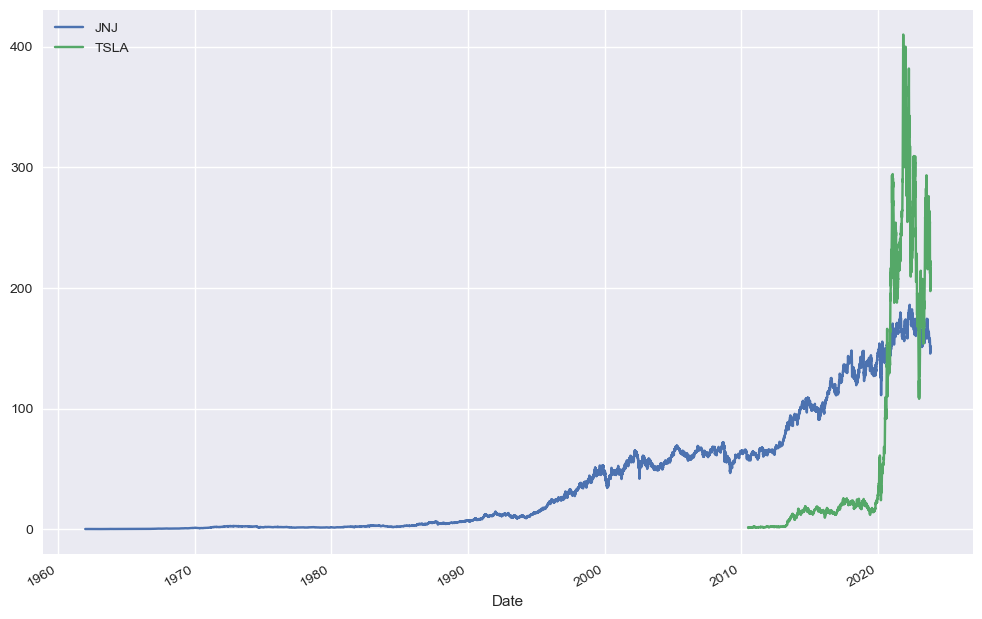

In [152]:
df.Close.plot(figsize = (12, 8))
plt.show()

In [153]:
# outer sample
df = df.swaplevel(axis = "columns").sort_index(axis = "columns")
df

JNJ                                                \
             Adj Close       Close Dividends        High         Low   
Date                                                                   
1962-01-02    0.065015    0.223380       0.0    0.223380    0.222222   
1962-01-03    0.064004    0.219907       0.0    0.221065    0.219907   
1962-01-04    0.063330    0.217593       0.0    0.221065    0.217593   
1962-01-05    0.062320    0.214120       0.0    0.215856    0.214120   
1962-01-08    0.061309    0.210648       0.0    0.212384    0.210648   
...                ...         ...       ...         ...         ...   
2023-11-02  150.240005  150.240005       0.0  150.399994  147.539993   
2023-11-03  151.339996  151.339996       0.0  152.270004  150.149994   
2023-11-06  151.699997  151.699997       0.0  152.429993  151.369995   
2023-11-07  150.899994  150.899994       0.0  152.250000  150.679993   
2023-11-08  150.654999  150.654999       0.0  151.830002  150.509995   

                                                    TSLA              \
                  Open Stock Splits   Volume   Adj Close       Close   
Date                                                                   
1962-01-02    0.000000          0.0        0         NaN         NaN   
1962-01-03    0.000000          0.0   345600         NaN         NaN   
1962-01-04    0.000000          0.0   216000         NaN         NaN   
1962-01-05    0.000000          0.0   129600         NaN         NaN   
1962-01-08    0.000000          0.0   172800         NaN         NaN   
...                ...          ...      ...         ...         ...   
2023-11-02  147.710007          0.0  5349100  218.509995  218.509995   
2023-11-03  151.210007          0.0  4925500  219.960007  219.960007   
2023-11-06  151.779999          0.0  4851400  219.270004  219.270004   
2023-11-07  151.929993          0.0  4840400  222.179993  222.179993   
2023-11-08  151.350006          0.0  1539680  220.069901  220.069901   

                                                                       \
           Dividends        High         Low        Open Stock Splits   
Date                                                                    
1962-01-02       NaN         NaN         NaN         NaN          NaN   
1962-01-03       NaN         NaN         NaN         NaN          NaN   
1962-01-04       NaN         NaN         NaN         NaN          NaN   
1962-01-05       NaN         NaN         NaN         NaN          NaN   
1962-01-08       NaN         NaN         NaN         NaN          NaN   
...              ...         ...         ...         ...          ...   
2023-11-02       0.0  219.199997  211.449997  212.970001          0.0   
2023-11-03       0.0  226.369995  218.399994  221.149994          0.0   
2023-11-06       0.0  226.320007  215.000000  223.979996          0.0   
2023-11-07       0.0  223.119995  215.720001  219.979996          0.0   
2023-11-08       0.0  224.149994  217.860001  223.149994          0.0   

                         
                 Volume  
Date                     
1962-01-02          NaN  
1962-01-03          NaN  
1962-01-04          NaN  
1962-01-05          NaN  
1962-01-08          NaN  
...                 ...  
2023-11-02  125987600.0  
2023-11-03  119281000.0  
2023-11-06  117335800.0  
2023-11-07  116660800.0  
2023-11-08   54555149.0  

[15571 rows x 16 columns]

In [154]:
jnj = df.JNJ
jnj

,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume
Date,,,,,,,,
1962-01-02,0.065015,0.223380,0.0,0.223380,0.222222,0.000000,0.0,0
1962-01-03,0.064004,0.219907,0.0,0.221065,0.219907,0.000000,0.0,345600
1962-01-04,0.063330,0.217593,0.0,0.221065,0.217593,0.000000,0.0,216000
1962-01-05,0.062320,0.214120,0.0,0.215856,0.214120,0.000000,0.0,129600
1962-01-08,0.061309,0.210648,0.0,0.212384,0.210648,0.000000,0.0,172800
...,...,...,...,...,...,...,...,...
2023-11-02,150.240005,150.240005,0.0,150.399994,147.539993,147.710007,0.0,5349100
2023-11-03,151.339996,151.339996,0.0,152.270004,150.149994,151.210007,0.0,4925500
2023-11-06,151.699997,151.699997,0.0,152.429993,151.369995,151.779999,0.0,4851400


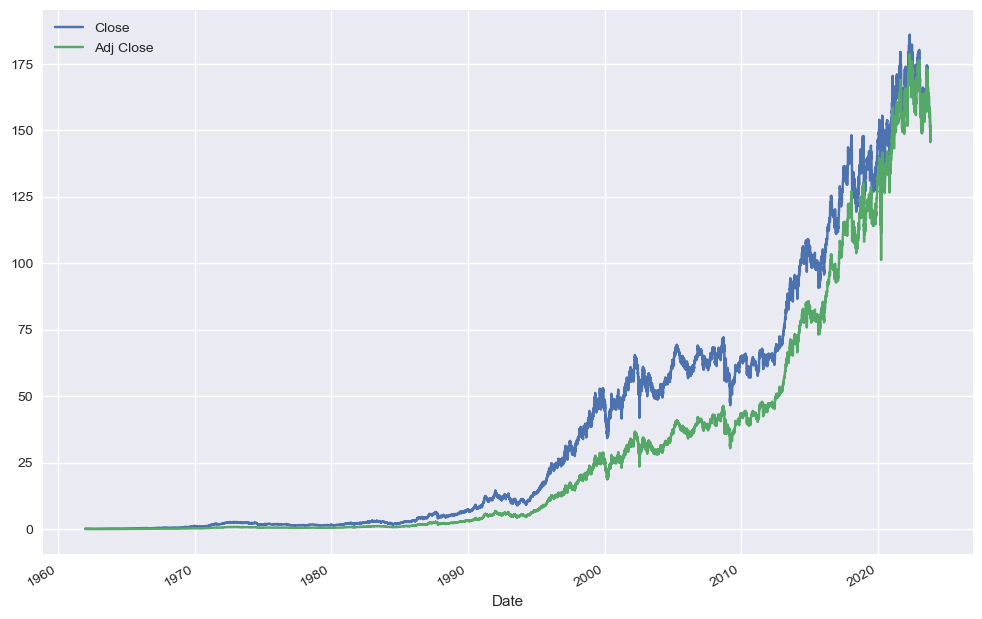

In [155]:
jnj[["Close", "Adj Close"]].plot(figsize = (12, 8))
plt.show()

__Dividends__

In [156]:
jnj.Dividends.sum()

61.47008400000001

__Price Increase__

In [157]:
jnj.Close[-1] - jnj.Close[0]

150.4316187798977

__Dividend Policy__

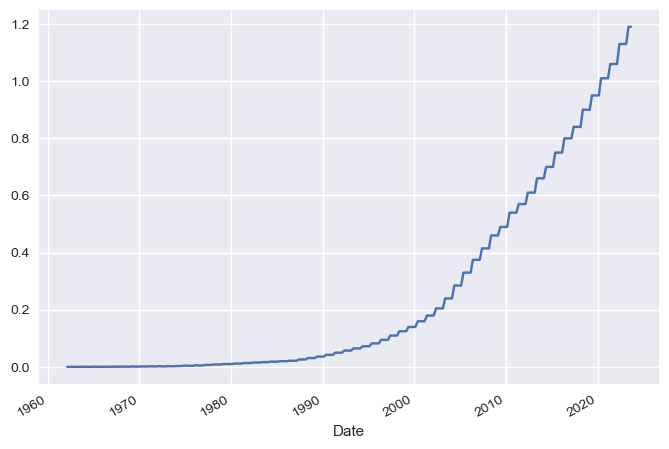

In [158]:
jnj.loc[jnj.Dividends != 0].Dividends.plot()
plt.show()

In [159]:
tsla = df.TSLA.dropna()
tsla

,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume
Date,,,,,,,,
2010-06-29,1.592667,1.592667,0.0,1.666667,1.169333,1.266667,0.0,281494500.0
2010-06-30,1.588667,1.588667,0.0,2.028000,1.553333,1.719333,0.0,257806500.0
2010-07-01,1.464000,1.464000,0.0,1.728000,1.351333,1.666667,0.0,123282000.0
2010-07-02,1.280000,1.280000,0.0,1.540000,1.247333,1.533333,0.0,77097000.0
2010-07-06,1.074000,1.074000,0.0,1.333333,1.055333,1.333333,0.0,103003500.0
...,...,...,...,...,...,...,...,...
2023-11-02,218.509995,218.509995,0.0,219.199997,211.449997,212.970001,0.0,125987600.0
2023-11-03,219.960007,219.960007,0.0,226.369995,218.399994,221.149994,0.0,119281000.0
2023-11-06,219.270004,219.270004,0.0,226.320007,215.000000,223.979996,0.0,117335800.0


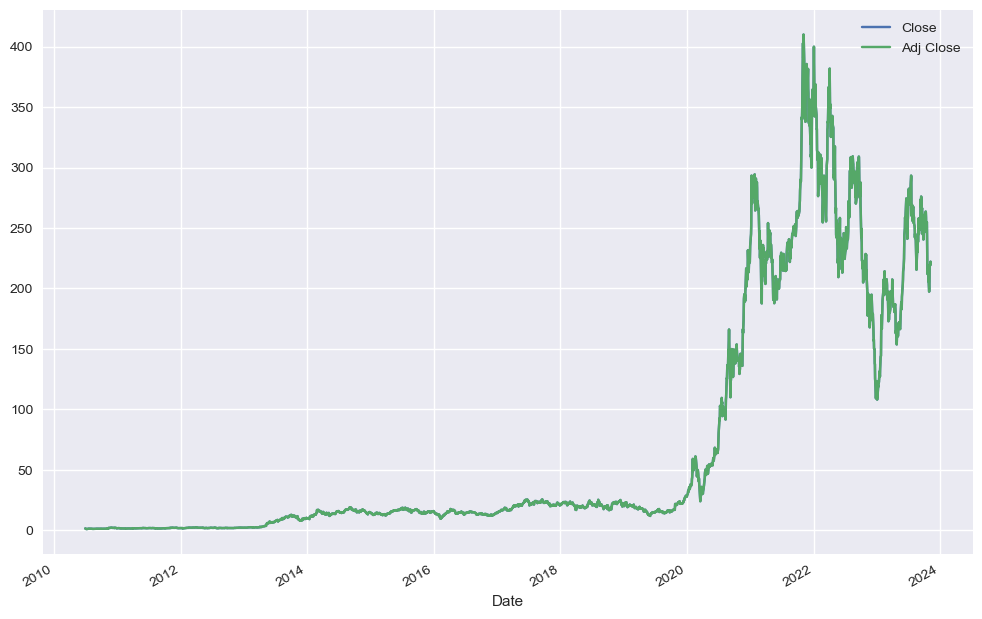

In [160]:
tsla[["Close", "Adj Close"]].plot(figsize = (12, 8))
plt.show()

__Dividends__

In [161]:
# There is no dividents
tsla.Dividends.sum()

0.0

__Price Increase__

In [162]:
tsla.Close[-1] - tsla.Close[0]

218.47723352909088

__Dividend Policy__

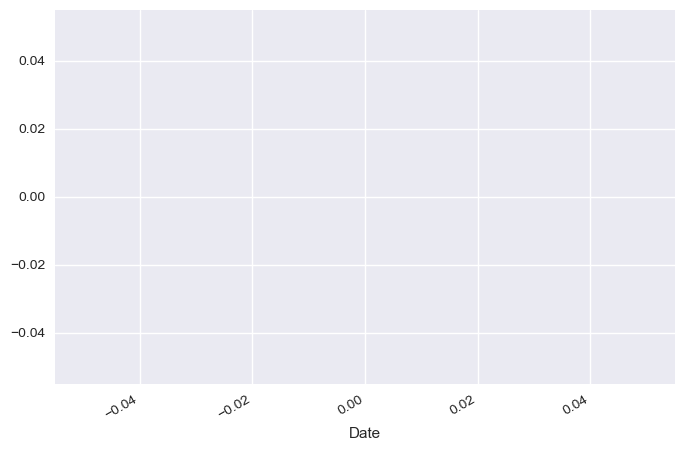

In [163]:
tsla.loc[tsla.Dividends != 0].Dividends.plot()
plt.show()

__-> JNJ is the high-dividend stock__